In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import random as rd
import copy
import time

In [2]:
max_nodes_IC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'Father_Rhyme', 'ColoradoPOYB', 'Proudboy13', 'AWallfred', 'pullarkkat', 's817m', 'Somerled10', 'CodyBarnes13', 'GunsGodandTexas']
times_IC = [10.741265773773193, 236.766015291214, 627.04882645607, 1146.5669751167297, 1785.7016961574554, 2523.2258718013763, 3351.641788005829, 4245.376266717911, 5212.538978815079, 6237.875088214874,
       7317.844819784164, 8447.575536966324, 9625.548919200897, 10851.33715724945, 12123.000044822693, 13442.503648996353, 14809.777120113373, 16218.910614013672, 17672.560995817184, 19170.619923830032]

In [3]:
max_nodes_DC = ['Premises187', 'SmashCM79', 'enrique_tarrio', 'Virgil_McMahon', 'principe_giovan', 'ProudBoysUS', 'UKProudBoys']
times_DC = [45.92418146133423, 2417.8300099372864, 7062.58691573143, 12848.983585834503, 19472.73256444931,26672.268117189407, 34460.22046685219]

In [4]:
max_nodes_WC = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012', 'ProudBoysGBG', 'ProudBoysUS', 'ProudBoyzLondon', 'DetroitProudBoy', 'ColoradoPOYB', 'maver_michael', 'Father_Rhyme', 'PrismicTitan', 'LOLA_WTO_Brexit', 'BlackGoatWhite', 'drjosuemd', 'JoelleClosset', 'BEARDTRIBE']
times_WC = [10.501221656799316, 235.98831987380981, 625.4327020645142, 1132.241504907608, 1809.7334263324738, 2598.581643819809, 3467.8672041893005, 4406.797207117081, 5355.24767780304, 6342.11412024498, 
          7458.015537261963, 8603.017973661423, 9797.863656759262, 11074.132063627243, 12310.55555319786, 13591.142619132996, 14951.905377626419, 16330.707174301147, 17719.568944215775, 19143.71673488617]

In [5]:
max_nodes_TR = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'PrestorJohnAR', 'M4CTweets', 'RallyPb', 'TheHarlster', 'RealBeardedMen', 'TumultuousDon', 'DeathsquadFarm', 'scouse_sammii', 'real_billdoor', 'Foxwaldo', 'OttoOttofrank', 'MeganTh27826133', 'DeathsquadSF', 'Brandnewkath', 'dzio2004', 'scottpainter123']
times_TR = [18.129921674728394, 116.46895289421082, 287.21111941337585, 524.85125207901, 832.4093346595764, 1179.2758343219757, 1560.4931123256683, 1978.5172753334045, 2432.163257598877, 2921.079366207123, 3449.5212614536285, 4011.258317708969, 4609.557200670242, 5245.202206134796, 5914.974735498428, 6624.52285861969, 7362.484108924866, 8138.456142425537, 8949.351233005524, 9795.637311220169]

In [6]:
times_LT = [19.702130794525146, 1544.5256478786469, 4262.469393253326, 7565.090893030167, 11476.942583084106, 15757.525126934052, 20229.2757062912]
max_nodes_LT = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_', 'enrique_tarrio', 'GavinM_ProudBoy', 'proudboy2012']

In [7]:
max_nodes_GT = ['principe_giovan', 'Premises187', 'MoralDK', 'proudboy_']
times_GT = [24.321068286895752, 4938.9485912323, 12814.373059272766, 22763.65157723427]

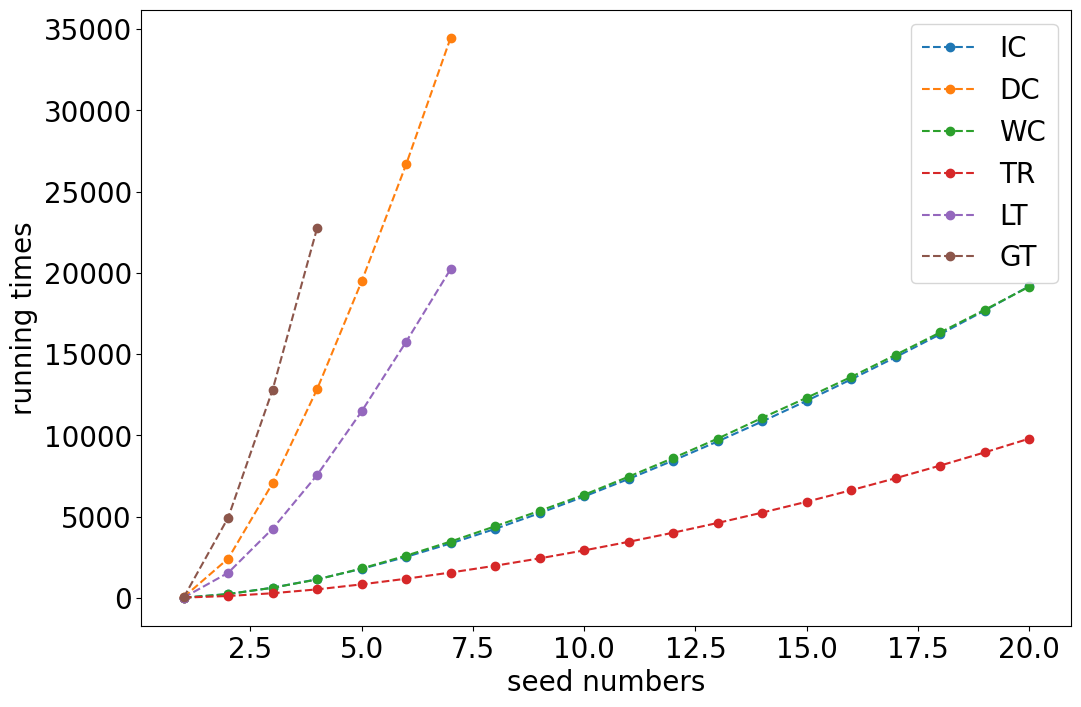

In [8]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(times_IC)+1), times_IC, 'o--', label = 'IC')
plt.plot(np.arange(1, len(times_DC)+1), times_DC, 'o--', label = 'DC')
plt.plot(np.arange(1, len(times_WC)+1), times_WC, 'o--', label = 'WC')
plt.plot(np.arange(1, len(times_TR)+1), times_TR, 'o--', label = 'TR')
plt.plot(np.arange(1, len(times_LT)+1), times_LT, 'o--', label = 'LT')
plt.plot(np.arange(1, len(times_GT)+1), times_GT, 'o--', label = 'GT')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running times', fontsize=20)
plt.legend(fontsize=20)

In [9]:
class Independent_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            if(in_degree[e[1]] >= 10):
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / int(np.log(in_degree[e[1]]))
            else:
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1
        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [10]:
class Decreasing_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.max_out_degree = 0
        self.probability = None

    def fit(self, g):
        # fit graph with probability
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.max_out_degree = max(j for _, j in g.out_degree(weight='None'))
        out_degree = g.out_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            if(out_degree[e[0]] >= 10):
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / int(np.log(out_degree[e[0]]))
            else:
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1
            
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
        
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        inform_times = np.zeros(self.num_nodes)
        while(True):
            new_activated_nodes = []
            new_inform_times = np.zeros(self.num_nodes)
            for node in old_activated_nodes:
                predecessors = self.probability[:, node].nonzero()[0]
                if(len(predecessors) == 0):
                    continue
                for predecessor in predecessors:
                    if(predecessor in activated_nodes and predecessor not in new_activated_nodes):
                        continue
                    new_inform_times[predecessor] += 1
                    if (self.probability[predecessor][node] >= (rd.random() + inform_times[predecessor] / self.max_out_degree)):
                        new_activated_nodes.append(predecessor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
            inform_times = inform_times + new_inform_times
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        inform_times = np.zeros(self.num_nodes)
        for step in range(max_step):
            new_activated_nodes = []
            new_inform_times = np.zeros(self.num_nodes)
            for node in old_activated_nodes:
                predecessors = self.probability[:, node].nonzero()[0]
                if(len(predecessors) == 0):
                    continue
                for predecessor in predecessors:
                    if(predecessor in activated_nodes and predecessor not in new_activated_nodes):
                        continue
                    new_inform_times[predecessor] += 1
                    if (self.probability[predecessor][node] >= (rd.random() + inform_times[predecessor] / self.max_out_degree)):
                        new_activated_nodes.append(predecessor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
            inform_times = inform_times + new_inform_times
        return activated_nodes, activate_nums

In [11]:
class Weighted_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [12]:
class Trivalency_Model():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        p_list = [0.1, 0.01, 0.001]
        for e in g.edges():
            self.probability[self.label2id[e[0]], self.label2id[e[1]]] = rd.choice(p_list)

        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [13]:
class linear_threshold():
    def __init__(self):
        self.g = nx.DiGraph()
        self.influence = None
    
    def fit(self, g):
        # fit graph with probability
        in_degree = g.in_degree()
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        max_degree = max([d for (n, d) in in_degree])
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.influence = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        # init influence 
        for e in g.edges():
            self.influence[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        self.g = g
        return g
    
    # diffusion to all possible nodes
    def diffusion_all(self, init_seed, threshold=0.1):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_activated_nodes)]
        while True:
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                total_influence = 0.0
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    successors = self.influence[:, neighbor].nonzero()[0]
                    for successor in successors:
                        total_influence += self.influence[successor][neighbor]
                    if(total_influence >= threshold):
                        new_activated_nodes.append(neighbor)
            if len(new_activated_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    # diffusion to max step
    def diffusion_step(self, init_seed, threshold=0.1, max_step=1):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_activated_nodes)]
        for _ in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                total_influence = 0.0
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    successors = self.influence[:, neighbor].nonzero()[0]
                    for successor in successors:
                        total_influence += self.influence[successor][neighbor]
                    if(total_influence >= threshold):
                        new_activated_nodes.append(neighbor)
            if len(new_activated_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times

In [14]:
class general_threshold():
    def __init__(self):
        self.g = nx.DiGraph()
        self.influence = None
        # threshold determine whether the node become activated
        self.threshold = None
        # spreadTrd determine whether the node have the ability to spread message
        self.spreadTrd = None
    
    def fit(self, g):
        # fit graph with probability
        in_degree = g.in_degree()
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.influence = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        centrality = nx.degree_centrality(g)
        # init influence
        for e in g.edges():
            self.influence[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        # init threshold. In GT model, the threshold of each node is assigned half of it's centrality
        self.threshold = np.zeros((self.num_nodes), dtype=float)
        self.spreadTrd = np.zeros((self.num_nodes), dtype=float)
        for n in g.nodes():
            self.threshold[self.label2id[n]] = centrality[n]/4
            self.spreadTrd[self.label2id[n]] = centrality[n]/2
        self.g = g
        return g
    
    # diffusion to all possible nodes
    def diffusion_all(self, init_seed):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_spread_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_spread_nodes)]
        while True:
            new_activated_nodes = []
            new_spread_nodes = []
            for node in old_spread_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                total_influence = 0.0
                for neighbor in neighbors:
                    if(neighbor in activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors:
                        if precessor in activated_nodes or precessor in new_activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    # informe/activate the node if the total influence exceeds it's threshold of activated
                    if(total_influence >= self.threshold[neighbor]):
                        new_activated_nodes.append(neighbor)
                        # let node be a spreader if the total influence exceeds it's threshold of spread
                        if(total_influence >= self.spreadTrd[neighbor]):
                            new_spread_nodes.append(neighbor)
            if len(new_spread_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_spread_nodes = copy.deepcopy(new_spread_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    # diffusion to max step
    def diffusion_step(self, init_seed, max_step=1):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_spread_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_spread_nodes)]
        for _ in range(max_step):
            new_activated_nodes = []
            new_spread_nodes = []
            for node in old_spread_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                total_influence = 0.0
                for neighbor in neighbors:
                    if(neighbor in activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors:
                        if precessor in activated_nodes or precessor in new_activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    # informe/activate the node if the total influence exceeds it's threshold of activated
                    if(total_influence >= self.threshold[neighbor]):
                        new_activated_nodes.append(neighbor)
                        # let node be a spreader if the total influence exceeds it's threshold of spread
                        if(total_influence >= self.spreadTrd[neighbor]):
                            new_spread_nodes.append(neighbor)
            if len(new_spread_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_spread_nodes = copy.deepcopy(new_spread_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    

In [17]:
g = nx.read_gml('PB2020.gml')
g = g.reverse()

In [18]:
IC = Independent_Cascade()
IC.fit(g)
DC = Decreasing_Cascade()
DC.fit(g)
WC = Weighted_Cascade()
WC.fit(g)
TR = Trivalency_Model()
TR.fit(g)
LT = linear_threshold()
LT.fit(g)
GT = general_threshold()
GT.fit(g)

In [23]:
num_nodes_IC = []
for i in range(len(max_nodes_IC)):
    num_nodes_IC.append(sum(IC.monte_carlo_diffusion_all(max_nodes_IC[:i+1], 1000)))
print('num of nodes IC get',num_nodes_IC)

num of nodes IC get [852.751, 1150.7690000000002, 1458.0159999999998, 1579.5370000000003, 1650.5880000000002, 1684.597, 1725.89, 1738.6309999999999, 1761.086, 1779.183, 1796.358, 1806.19, 1810.1879999999999, 1813.183, 1814.281, 1815.154, 1816.007, 1817.0349999999999, 1818.257, 1819.624]


In [ ]:
num_nodes_IC = [852.751, 1150.7690000000002, 1458.0159999999998, 1579.5370000000003, 1650.5880000000002, 1684.597, 1725.89, 1738.6309999999999, 1761.086, 1779.183, 1796.358, 1806.19, 1810.1879999999999, 1813.183, 1814.281, 1815.154, 1816.007, 1817.0349999999999, 1818.257, 1819.624]

In [24]:
num_nodes_DC = []
for i in range(len(max_nodes_DC)):
    num_nodes_DC.append(sum(DC.monte_carlo_diffusion_all(max_nodes_DC[:i+1], 1000)))
print('num of nodes DC get',num_nodes_DC)

num of nodes DC get [4622.5869999999995, 9291.636999999999, 10695.322999999999, 11623.037999999999, 11736.302, 12439.979999999998, 12776.828000000001]


In [ ]:
num_nodes_DC = [4622.5869999999995, 9291.636999999999, 10695.322999999999, 11623.037999999999, 11736.302, 12439.979999999998, 12776.828000000001]

In [25]:
num_nodes_WC = []
for i in range(len(max_nodes_WC)):
    num_nodes_WC.append(sum(WC.monte_carlo_diffusion_all(max_nodes_WC[:i+1], 1000)))
print('num of nodes WC get',num_nodes_WC)

num of nodes WC get [552.774, 901.1519999999999, 1138.9859999999999, 1330.17, 1435.2359999999999, 1528.3799999999999, 1591.0880000000002, 1629.618, 1665.011, 1678.704, 1687.8870000000002, 1693.5130000000001, 1695.1490000000001, 1701.986, 1702.9660000000001, 1704.2350000000001, 1704.9769999999999, 1706.31, 1707.13, 1707.7939999999999]


In [ ]:
num_nodes_WC = [552.774, 901.1519999999999, 1138.9859999999999, 1330.17, 1435.2359999999999, 1528.3799999999999, 1591.0880000000002, 1629.618, 1665.011, 1678.704, 1687.8870000000002, 1693.5130000000001, 1695.1490000000001, 1701.986, 1702.9660000000001, 1704.2350000000001, 1704.9769999999999, 1706.31, 1707.13, 1707.7939999999999]

In [26]:
num_nodes_TR = []
for i in range(len(max_nodes_TR)):
    num_nodes_TR.append(sum(TR.monte_carlo_diffusion_all(max_nodes_TR[:i+1], 1000)))
print('num of nodes TR get',num_nodes_TR)

num of nodes TR get [22.381999999999998, 36.573, 47.23, 56.185, 57.07, 58.397, 59.29, 60.595, 61.451, 62.152, 63.489999999999995, 64.538, 65.573, 66.56, 67.23499999999999, 68.329, 69.29499999999999, 71.32499999999999, 71.83, 73.156]


In [ ]:
num_nodes_TR = [22.381999999999998, 36.573, 47.23, 56.185, 57.07, 58.397, 59.29, 60.595, 61.451, 62.152, 63.489999999999995, 64.538, 65.573, 66.56, 67.23499999999999, 68.329, 69.29499999999999, 71.32499999999999, 71.83, 73.156]

In [28]:
num_nodes_LT = []
for i in range(len(max_nodes_LT)):
    num_nodes_LT.append(sum(LT.diffusion_all(max_nodes_LT[:i+1])[1]))
print('num of nodes LT get',num_nodes_LT)

num of nodes LT get [1918, 1911, 2607, 2435, 1984, 1893, 1893]


In [ ]:
num_nodes_LT = [1918, 1911, 2607, 2435, 1984, 1893, 1893]

In [29]:
num_nodes_GT = []
for i in range(len(max_nodes_GT)):
    num_nodes_GT.append(sum(GT.diffusion_all(max_nodes_GT[:i+1])[1]))
print('num of nodes GT get',num_nodes_GT)

num of nodes GT get [1023, 1374, 1550, 1747]


In [ ]:
num_nodes_GT =  [1023, 1374, 1550, 1747]

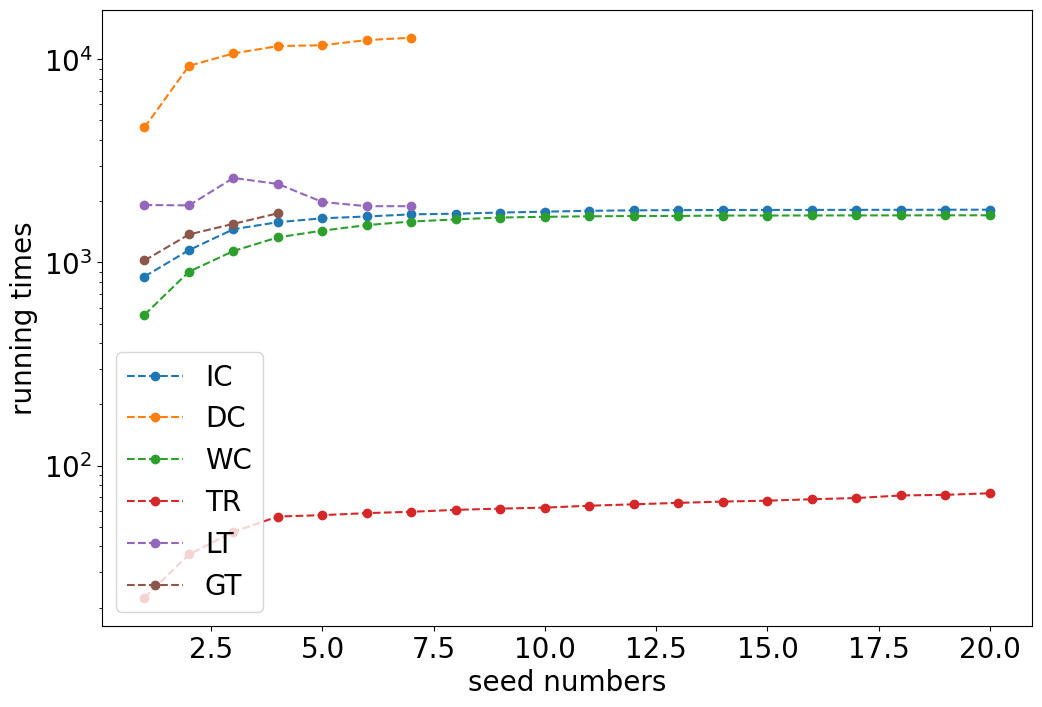

In [31]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(num_nodes_IC)+1), num_nodes_IC, 'o--', label='IC')
plt.plot(np.arange(1, len(num_nodes_DC)+1), num_nodes_DC, 'o--', label='DC')
plt.plot(np.arange(1, len(num_nodes_WC)+1), num_nodes_WC, 'o--', label='WC')
plt.plot(np.arange(1, len(num_nodes_TR)+1), num_nodes_TR, 'o--', label='TR')
plt.plot(np.arange(1, len(num_nodes_LT)+1), num_nodes_LT, 'o--', label='LT')
plt.plot(np.arange(1, len(num_nodes_GT)+1), num_nodes_GT, 'o--', label='GT')

plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running times', fontsize=20)
plt.legend(fontsize=20)